<h1>An integrated model for simulation of neonatal physiology</h1>
<h4>Antonius TAJ, van Meurs WL, Westerhof BE, de Boode WP</h4>

import the dependencies

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

store the model definition in the model_definition variable

In [ ]:
model_definition = {
   "name":"normal neonate",
   "description":"normal 3.3 kg neonate at an age of 24h with shunts",
   "weight": 3.3,
   "model_time_total": 0,
   "modeling_stepsize": 0.0005,
   "components": [
      {
         "name":"AA",
         "description":"ascending aorta",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.00455400,
         "u_vol":0.00296010,
         "el_base":28232,
         "el_k":0
      },
      {
         "name":"AAR",
         "description":"aortic arch",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.004870372057873171,
         "u_vol":0.00324844,
         "el_base":32323,
         "el_k":0
      },
      {
         "name":"AD",
         "description":"descending aorta",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.02935564265441993,
         "u_vol":0.018018,
         "el_base":4638,
         "el_k":0
      },
      {
         "name":"COR",
         "description":"coronary arteries",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.00039600,
         "u_vol": 0.00025740,
         "el_base":324675,
         "el_k":0
      },
      {
         "name":"RLB",
         "description":"lower body",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.005906303194596234,
         "u_vol":0.00433125,
         "el_base":6281,
         "el_k":0
      },
      {
         "name":"LS",
         "description":"liver and spleen",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.0017650572727390158,
         "u_vol":0.00129938,
         "el_base":20938,
         "el_k":0
      },
      {
         "name":"KID",
         "description":"KID",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.001180910733583115,
         "u_vol":0.00086625,
         "el_base":31407,
         "el_k":0
      },
      {
         "name":"INT",
         "description":"INT",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.0011738137315790986,
         "u_vol":0.00086625,
         "el_base":31407,
         "el_k":0
      },
      {
         "name":"RUB",
         "description":"upper body",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.002732503602794796,
         "u_vol":0.00216563,
         "el_base":12562,
         "el_k":0
      },
      {
         "name":"BR",
         "description":"brain",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.002732503602794796,
         "u_vol":0.00216563,
         "el_base":12562,
         "el_k":0
      },
      {
         "name":"IVCI",
         "description":"vena cava inferior intrathoracic",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.016176288666482266,
         "u_vol":0.0109824,
         "el_base":780,
         "el_k":0
      },
      {
         "name":"IVCE",
         "description":"vena cava inferior extrathoracic ",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.08874209047211135,
         "u_vol":0.05710848,
         "el_base":146,
         "el_k":0
      },
      {
         "name":"SVC",
         "description":"superior vena cava",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.0558415645326887,
         "u_vol":0.03624192,
         "el_base":230,
         "el_k":0
      },
      {
         "name":"PA",
         "description":"pulmonary artery",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.00598044851676989,
         "u_vol":0.00220523,
         "el_base":5830,
         "el_k":0
      },
      {
         "name":"LL",
         "description":"left lung",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.005654058574009633,
         "u_vol":0.00113603,
         "el_base":4398,
         "el_k":0
      },
      {
         "name":"RL",
         "description":"right lung",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.005654058574009633,
         "u_vol":0.00113603,
         "el_base":4398,
         "el_k":0
      },
      {
         "name":"PV",
         "description":"pulmonary veins",
         "type":"compliance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.007152031736221479,
         "u_vol":0.00514553,
         "el_base":4535,
         "el_k":0
      },
      {
         "name":"LA",
         "description":"left atrium",
         "type":"time_varying_elastance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.00276665414213919,
         "u_vol":0.00025,
         "el_min":1550,
         "el_max":2586,
         "el_k":0
      },
      {
         "name":"RA",
         "description":"right atrium",
         "type":"time_varying_elastance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.006969156896896902,
         "u_vol":0.00025,
         "el_min":550,
         "el_max":2086,
         "el_k":0
      },
      {
         "name":"LV",
         "description":"left ventricle",
         "type":"time_varying_elastance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.011550631290386972,
         "u_vol":0,
         "el_min":486,
         "el_max":12500,
         "el_k":0
      },
      {
         "name":"RV",
         "description":"right ventricle",
         "type":"time_varying_elastance",
         "subtype":"blood",
         "is_enabled":True,
         "vol":0.008055585040708649,
         "u_vol":0,
         "el_min":486,
         "el_max":20500,
         "el_k":0
      },
      {
         "name":"AA_AAR",
         "description":"ascending aorta to aortic arch",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AA",
         "comp_to":"AAR",
         "r_for":50,
         "r_back":50,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AA_COR",
         "description":"ascending aorta to coronaries",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AA",
         "comp_to":"COR",
         "r_for":300000,
         "r_back":300000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"COR_RA",
         "description":"coronaries to right atrium",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"COR",
         "comp_to":"RA",
         "r_for":75000,
         "r_back":75000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AAR_AD",
         "description":"aortic arch to descending aorta",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AAR",
         "comp_to":"AD",
         "r_for":50,
         "r_back":50,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AD_RLB",
         "description":"descending aorta to lower body",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AD",
         "comp_to":"RLB",
         "r_for":30000,
         "r_back":30000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AD_INT",
         "description":"descending aorta to INT",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AD",
         "comp_to":"INT",
         "r_for":30000,
         "r_back":30000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AD_LS",
         "description":"descending aorta to liver and spleen",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AD",
         "comp_to":"LS",
         "r_for":30000,
         "r_back":30000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AD_KID",
         "description":"descending aorta to kdineys",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AD",
         "comp_to":"KID",
         "r_for":15000,
         "r_back":15000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"KID_IVCE",
         "description":"kidneys to extra-thoracic inferior vena cava",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"KID",
         "comp_to":"IVCE",
         "r_for":15000,
         "r_back":15000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AAR_RUB",
         "description":"aortic arch to upper body",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AAR",
         "comp_to":"RUB",
         "r_for":16000,
         "r_back":16000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"AAR_BR",
         "description":"aortic arch to brain",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AAR",
         "comp_to":"BR",
         "r_for":16000,
         "r_back":16000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"RLB_IVCE",
         "description":"lower body to extrathoracic vci",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"RLB",
         "comp_to":"IVCE",
         "r_for":3200,
         "r_back":3200,
         "r_k1":0,
         "r_k2":0
      },

      {
         "name":"LS_IVCE",
         "description":"liver and spleen to extrathoracic vci",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"LS",
         "comp_to":"IVCE",
         "r_for":3200,
         "r_back":3200,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"INT_IVCE",
         "description":"intestines to extrathoracic vci",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"INT",
         "comp_to":"IVCE",
         "r_for":3200,
         "r_back":3200,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"RUB_SVC",
         "description":"upper body to superior vena cava",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"RUB",
         "comp_to":"SVC",
         "r_for":800,
         "r_back":800,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"BR_SVC",
         "description":"BR to superior vena cava",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"BR",
         "comp_to":"SVC",
         "r_for":800,
         "r_back":800,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"IVCE_IVCI",
         "description":"extrahoracic vena cava inferior to intrathoracic vci",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"IVCE",
         "comp_to":"IVCI",
         "r_for":12.5,
         "r_back":12.5,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"IVCI_RA",
         "description":"intrathoracic vena cava inferior to right atrium",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"IVCI",
         "comp_to":"RA",
         "r_for":12.5,
         "r_back":120.5,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"SVC_RA",
         "description":"superior vena cava inferior to right atrium",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"SVC",
         "comp_to":"RA",
         "r_for":25,
         "r_back":250,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"PA_LL",
         "description":"pulmonary artery to left lung",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"PA",
         "comp_to":"LL",
         "r_for":1200,
         "r_back":1200,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"PA_RL",
         "description":"pulmonary artery to right lung",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"PA",
         "comp_to":"RL",
         "r_for":1200,
         "r_back":1200,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"LL_PV",
         "description":"left lung to pulmonary veins",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"LL",
         "comp_to":"PV",
         "r_for":1800,
         "r_back":1800,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"RL_PV",
         "description":"right lung to pulmonary veins",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"RL",
         "comp_to":"PV",
         "r_for":1800,
         "r_back":1800,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"PV_LA",
         "description":"pulmonary veins to  left atrium",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"PV",
         "comp_to":"LA",
         "r_for":300,
         "r_back":300,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"RA_RV",
         "description":"tricuspid Valve",
         "type":"valve",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":True,
         "comp_from":"RA",
         "comp_to":"RV",
         "r_for":60,
         "r_back":1000000000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"RV_PA",
         "description":"pulmonary Valve",
         "type":"valve",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":True,
         "comp_from":"RV",
         "comp_to":"PA",
         "r_for":18,
         "r_back":1000000000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"LA_LV",
         "description":"mitral Valve",
         "type":"valve",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":True,
         "comp_from":"LA",
         "comp_to":"LV",
         "r_for":60,
         "r_back":1000000000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"LV_AA",
         "description":"aortic Valve",
         "type":"valve",
         "subtype":"blood",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":True,
         "comp_from":"LV",
         "comp_to":"AA",
         "r_for":18,
         "r_back":1000000000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"DA",
         "description":"ductus arteriosus",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":False,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"AAR",
         "comp_to":"PA",
         "r_for":5000,
         "r_back":5000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"FO",
         "description":"foramen ovale",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":False,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"LA",
         "comp_to":"RA",
         "r_for":2500,
         "r_back":2500,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"IPS",
         "description":"lung shunt",
         "type":"resistor",
         "subtype":"blood",
         "is_enabled":False,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"PA",
         "comp_to":"PV",
         "r_for":5000,
         "r_back":5000,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"OUT",
         "description":"outside air",
         "type":"compliance",
         "subtype":"gas",
         "is_enabled":True,
         "vol":1000000,
         "u_vol":1000000,
         "el_base":0.00076,
         "el_k":0
      },
      {
         "name":"NCA",
         "description":"non collapsible airways",
         "type":"compliance",
         "subtype":"gas",
         "is_enabled":True,
         "vol":0.005031868904299781,
         "u_vol":0.005,
         "el_base":40000,
         "el_k":0
      },
      {
         "name":"ALL",
         "description":"alveolar left lung",
         "type":"compliance",
         "subtype":"gas",
         "is_enabled":True,
         "vol":0.043372423236693707,
         "u_vol":0.03,
         "el_base":1000,
         "el_k":0
      },
      {
         "name":"ALR",
         "description":"alveolar right lung",
         "type":"compliance",
         "subtype":"gas",
         "is_enabled":True,
         "fixed_composition":False,
         "vol":0.043372423236693707,
         "u_vol":0.03,
         "el_base":1000,
         "el_k":0
      },
      {
         "name":"OUT_NCA",
         "description":"outside air to non-collapsible airways",
         "type":"resistor",
         "subtype":"gas",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"OUT",
         "comp_to":"NCA",
         "r_for":25,
         "r_back":25,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"NCA_ALL",
         "description":"non-collapsible airways to alveolar left lung",
         "type":"resistor",
         "subtype":"gas",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"NCA",
         "comp_to":"ALL",
         "r_for":75,
         "r_back":75,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"NCA_ALR",
         "description":"non-collapsible airways to alveolar right lung",
         "type":"resistor",
         "subtype":"gas",
         "is_enabled":True,
         "no_flow":False,
         "no_backflow":False,
         "comp_from":"NCA",
         "comp_to":"ALR",
         "r_for":75,
         "r_back":75,
         "r_k1":0,
         "r_k2":0
      },
      {
         "name":"CHEST_L",
         "description":"chestwall left",
         "type":"compliance",
         "subtype":"container",
         "is_enabled":True,
         "comps":[
            "ALL"
         ],
         "vol":0.043372423236693707,
         "u_vol":0.09,
         "el_base":110,
         "el_k":0
      },
      {
         "name":"CHEST_R",
         "description":"chestwall right",
         "type":"compliance",
         "subtype":"container",
         "is_enabled":True,
         "comps":[
            "ALR"
         ],
         "vol":0.043372423236693707,
         "u_vol":0.09,
         "el_base":110,
         "el_k":0
      },
      {
         "name":"GASEX_LL",
         "description":"gasexchange blood-gas left lung",
         "type":"exchanger",
         "subtype":"blood_gas",
         "comp_blood":"LL",
         "comp_gas":"ALL",
         "is_enabled":True,
         "dif_o2":0.01,
         "dif_co2":0.01,
         "dif_n2":0.01,
         "dif_other":0.01
      },
      {
         "name":"GASEX_LR",
         "description":"gasexchange blood-gas right lung",
         "type":"exchanger",
         "subtype":"blood_gas",
         "comp_blood":"LR",
         "comp_gas":"ALR",
         "is_enabled":True,
         "dif_o2":0.01,
         "dif_co2":0.01,
         "dif_n2":0.01,
         "dif_other":0.01
      }
   ],
   "models":[
      {
         "name":"ecg",
         "description":"ecg",
         "type":"model",
         "subtype":"ecg",
         "is_enabled":True,
         "heart_rate": 120,
         "heart_rate_ref": 120,
         "venticular_escape_rate":40,
         "rhythm_type":0,
         "pq_time":0.1,
         "av_delay":0.02,
         "qrs_time":0.075,
         "qt_time":0.4,
         "cqt_time":0.19773180231718618,
         "amp_p":1,
         "skew_p":2.5,
         "width_p":20,
         "amp_q":-0.5,
         "width_q":20,
         "skew_q":2,
         "amp_r":10,
         "width_r":20,
         "skew_r":2.5,
         "amp_s":-1.5,
         "width_s":20,
         "skew_s":10,
         "amp_t":2,
         "skew_t":2,
         "width_t":25
      },
      {
         "name":"metabolism",
         "description":"metabolism",
         "type":"model",
         "subtype":"metabolism",
         "is_enabled":True,
         "atp_need":0.14,
         "resp_q":0.8,
         "p_atm":760,
         "outside_temp":20,
         "body_temp":36.9,
         "active_comps": [
            {  "comp": "RLB", "fvatp": 0.185 },
            {  "comp": "KID", "fvatp": 0.1 },
            {  "comp": "LS", "fvatp": 0.1 },
            {  "comp": "INT", "fvatp": 0.1 },
            {  "comp": "RUB", "fvatp": 0.2 },
            {  "comp": "BR", "fvatp": 0.25 },
            {  "comp": "COR", "fvatp": 0.05 },
            {  "comp": "AA", "fvatp": 0.005 },
            {  "comp": "AD", "fvatp": 0.01 }
         ]
      },
      {
         "name":"heart",
         "description":"heart contraction",
         "type":"model",
         "subtype":"heart",
         "is_enabled":True,
         "activation_delay":0,
         "a": 2
      },
      {
         "name":"lungs",
         "description":"lung model",
         "type":"model",
         "subtype":"lungs",
         "is_enabled":False
      },
      {
         "name":"breathing",
         "description":"spontaneous breathing",
         "type":"model",
         "subtype":"breathing",
         "is_enabled":True,
         "spont_breathing_enabled":True,
         "spont_resp_rate":20.52573656465455,
         "ref_minute_volume":0.63,
         "ref_tidal_volume":0.018,
         "target_minute_volume":0.8225647818957809,
         "target_tidal_volume":0.01767977989456873,
         "vtrr_ratio":0.00038,
         "resp_muscle_pressure":-5.026490573324616,
         "max_amp":50,
         "breath_duration":1000
      },

      {
         "name":"ans",
         "description":"autonomic nervous system",
         "type":"model",
         "subtype":"ans",
         "is_enabled":True,
         "th_lungvol":0.04,
         "op_lungvol":0.05,
         "sa_lungvol":0.06,
         "th_map":30,
         "op_map":45,
         "sa_map":70,
         "th_po2":5.25,
         "op_po2":52.5,
         "sa_po2":52.5,
         "th_pco2":25,
         "op_pco2":40,
         "sa_pco2":70,
         "th_ph":7,
         "op_ph":7.39,
         "sa_ph":7.6,
         "tc_po2_hp":3,
         "tc_map_hp":2,
         "tc_map_cont":2,
         "tc_map_venpool":2,
         "tc_map_res":2,
         "tc_po2_ve":10,
         "tc_pco2_hp":2,
         "tc_pco2_ve":5,
         "tc_ph_hp":2,
         "tc_ph_ve":2,
         "tc_lungvol_hp":20,
         "g_po2_ve":-0.0067,
         "g_ph_ve":0.45,
         "g_ph_hp":0,
         "g_pco2_ve":0.025,
         "g_pco2_hp":0,
         "g_po2_hp":-2,
         "g_map_cont":0,
         "g_map_res":0,
         "g_map_venpool":0,
         "g_map_hp":10,
         "g_lungvol_hp":-0.1,
         "lung_vol_hp_threshold":0.00025
      },
      {
         "name":"blood",
         "description":"",
         "type":"model",
         "subtype":"blood",
         "is_enabled":True,
         "compounds":{
            "to2":8,
            "tco2":25.18,
            "sodium":138,
            "chloride":100,
            "hemoglobin":10,
            "albumin":30,
            "phosphates":1.5,
            "sid":41.6,
            "uma":10
         }
      },
      {
         "name":"gas",
         "description":"",
         "type":"model",
         "subtype":"gas",
         "is_enabled":True,
         "gas_constant":62.36367,
         "temp_room":20,
         "p_atm": 760,
         "dry_air":{
            "fo2":0.2095,
            "fargon":0.0092,
            "fco2":0.0004,
            "fn2":0.7809
         }
      },
      {
         "name":"acidBase",
         "description":"",
         "type":"model",
         "subtype":"acidbase"
      },
      {
         "name":"oxygenation",
         "description":"",
         "type":"model",
         "subtype":"oxygenation"
      }
   ]
}

define a compliance element

In [ ]:
class Compliance:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties (name, description, type, subtype, is_enabled, vol, u_vol, el_base, el_k)
    for key, value in args.items():
      setattr(self, key, value)

    # initialize the dependent properties
    self.pres = 0
    self.recoil_pressure = 0
    self.pres_outside = 0

  def calculate_pressure (self):
    if self.is_enabled:
      # calculate the volume above the unstressed volume
      vol_above_unstressed = self.vol - self.u_vol

      # calculate the elastance, which is volume dependent in a non-linear way
      elastance = self.el_base + self.el_k * pow(vol_above_unstressed, 2)

      # calculate pressure in the compliance
      self.recoil_pressure = vol_above_unstressed * elastance

      # calculate the transmural pressure
      self.pres = self.recoil_pressure + self.pres_outside


  def volume_in (self, dvol, comp_from):
    if self.is_enabled:
      # add volume
      self.vol += dvol

      # guard against negative volumes (will probably never occur in this routine)
      return self.protect_mass_balance

  def volume_out (self, dvol, comp_from):
    if self.is_enabled:
      # add volume
      self.vol -= dvol

      # guard against negative volumes (will probably never occur in this routine)
      return self.protect_mass_balance

  def protect_mass_balance (self):
    if (self.vol < 0):
      # if there's a negative volume it might corrupt the mass balance of the model so we have to return the amount of volume which could not be displaced to the caller of this function
      _nondisplaced_volume = -self.vol
      # set the current volume to zero
      self.vol = 0
      # return the amount volume which could not be removed
      return _nondisplaced_volume
    else:
      # massbalance is guaranteed
      return 0


define a resistor element

In [ ]:
class Resistor:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties (name, description, type, subtype, no_flow, no_backflow, comp_from, comp_to, r_for, r_back, r_k1, rk2)
    for key, value in args.items():
      setattr(self, key, value)

    comp_from_found = False
    comp_to_found = False

    # store a reference to the compliances which this resistor 'connects'
    if self.comp_from in model.compliances:
      self.comp1 = model.compliances[self.comp_from]
      comp_from_found = True
    
    if self.comp_from in model.time_varying_elastances:
      self.comp1 = model.time_varying_elastances[self.comp_from]
      comp_from_found = True

    if self.comp_to in model.compliances:
      self.comp2 = model.compliances[self.comp_to]
      comp_to_found = True
    
    if self.comp_to in model.time_varying_elastances:
      self.comp2 = model.time_varying_elastances[self.comp_to]
      comp_to_found = True

    if (comp_from_found == False):
      print('Resistor', self.name, 'could not find compliance/time_varying_elastance', self.comp_from)

    if (comp_to_found == False):
      print('Resistor', self.name, 'could not find compliance/time_varying_elastance', self.comp_to)

    # get the modeling stepsize from the model
    self.t = model.modeling_stepsize

    # initialize the dependent properties
    self.flow = 0
    self.resistance = 0

  def calculate_resistance(self, p1, p2):
    # calculate the flow dependent parts of the resistance
    nonlin_fac1 = self.r_k1 * self.flow
    nonlin_fac2 = self.r_k2 * pow(self.flow, 2)

    if (p1 > p2):
      return self.r_for + nonlin_fac1 + nonlin_fac2
    else:
      return self.r_back + nonlin_fac1 + nonlin_fac2

  def calculate_flow(self):
    if self.is_enabled:
      # get the pressures from comp1 and comp2
      p1 = self.comp1.pres
      p2 = self.comp2.pres

      # calculate the resistance
      self.resistance = self.calculate_resistance(p1, p2)

      # first check whether the no_flow flag is checked
      if (self.no_flow):
        self.flow = 0
      else:
        self.flow = (p1 - p2) / self.resistance
        # check whether backflow is allowed across this resistor
        if (self.flow < 0 and self.no_backflow):
          self.flow = 0
      
      # now we have the flow in l/sec and we have to convert it to l by multiplying it by the modeling_stepsize
      dvol = self.flow * self.t

      # change the volumes of the compliances
      if (dvol > 0):
        # positive values mean comp1 loses volume and comp2 gains volume
        self.comp1.volume_out(dvol, self.comp2)
        self.comp2.volume_in(dvol, self.comp1)
      else:
        # negative values mean comp1 gains volume and comp2 loses volume
        self.comp1.volume_in(-dvol, self.comp2)
        self.comp2.volume_out(-dvol, self.comp1)
    else:
        self.flow = 0


define a time varying elastance element

In [ ]:
class TimeVaryingElastance:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties (name, description, type, subtype, is_enabled, vol, u_vol, el_min, el_max, el_k)
    for key, value in args.items():
      setattr(self, key, value)

    # dependent properties
    self.varying_elastance_factor = 0

    # initialize the dependent properties
    self.pres = 0
    self.recoil_pressure = 0
    self.pres_outside = 0

  def calculate_pressure (self):
    if self.is_enabled:
      # calculate the volume above the unstressed volume
      vol_above_unstressed = self.vol - self.u_vol

      # calculate the elastance, which is volume dependent in a non-linear way and dependent on the varying elastance factor
      elastance = self.el_min + ((self.el_max - self.el_min) * self.varying_elastance_factor) + self.el_k * pow(vol_above_unstressed, 2)

      # calculate pressure the recoil pressure
      self.recoil_pressure = vol_above_unstressed * elastance

      # calculate the transmural pressure
      self.pres = self.recoil_pressure + self.pres_outside

  def volume_in (self, dvol, comp_from):
    if self.is_enabled:
      # change volume
      self.vol += dvol

      # guard against negative volumes (will probably never occur in this routine)
      return self.protect_mass_balance

  def volume_out (self, dvol, comp_from):
    if self.is_enabled:
      # change volume
      self.vol -= dvol

      # guard against negative volumes (will probably never occur in this routine)
      return self.protect_mass_balance
      
  def protect_mass_balance (self):
    if (self.vol < 0):
      # if there's a negative volume it might corrupt the mass balance of the model so we have to return the amount of volume which could not be displaced to the caller of this function
      _nondisplaced_volume = -self.vol
      # set the current volume to zero
      self.vol = 0
      # return the amount volume which could not be removed
      return _nondisplaced_volume
    else:
      # massbalance is guaranteed
      return 0

define a valve element

In [ ]:
class Valve:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties (name, description, type, subtype, no_flow, no_backflow, comp_from, comp_to, r_for, r_back, r_k1, rk2)
    for key, value in args.items():
      setattr(self, key, value)

    comp_from_found = False
    comp_to_found = False

    # store a reference to the compliances which this resistor 'connects'
    if self.comp_from in model.compliances:
      self.comp1 = model.compliances[self.comp_from]
      comp_from_found = True
    
    if self.comp_from in model.time_varying_elastances:
      self.comp1 = model.time_varying_elastances[self.comp_from]
      comp_from_found = True

    if self.comp_to in model.compliances:
      self.comp2 = model.compliances[self.comp_to]
      comp_to_found = True
    
    if self.comp_to in model.time_varying_elastances:
      self.comp2 = model.time_varying_elastances[self.comp_to]
      comp_to_found = True

    if (comp_from_found == False):
      print('Valve', self.name, 'could not find compliance/time_varying_elastance', self.comp_from)

    if (comp_to_found == False):
      print('Valve', self.name, 'could not find compliance/time_varying_elastance', self.comp_to)

    # get the modeling stepsize from the model
    self.t = model.modeling_stepsize

    # initialize the dependent properties
    self.flow = 0
    self.resistance = 0

  def calculate_resistance(self, p1, p2):
    # calculate the flow dependent parts of the resistance
    nonlin_fac1 = self.r_k1 * self.flow
    nonlin_fac2 = self.r_k2 * pow(self.flow, 2)

    if (p1 > p2):
      return self.r_for + nonlin_fac1 + nonlin_fac2
    else:
      return self.r_back + nonlin_fac1 + nonlin_fac2

  def calculate_flow(self):
    if self.is_enabled:
      # get the pressures from comp1 and comp2
      p1 = self.comp1.pres
      p2 = self.comp2.pres

      # calculate the resistance
      self.resistance = self.calculate_resistance(p1, p2)

      # first check whether the no_flow flag is checked
      if (self.no_flow):
        self.flow = 0
      else:
        self.flow = (p1 - p2) / self.resistance
        # check whether backflow is allowed across this resistor
        if (self.flow < 0 and self.no_backflow):
          self.flow = 0
      
      # now we have the flow in l/sec and we have to convert it to l by multiplying it by the modeling_stepsize
      dvol = self.flow * self.t

      # change the volumes of the compliances
      if (dvol > 0):
        # positive values mean comp1 loses volume and comp2 gains volume
        self.comp1.volume_out(dvol, self.comp2)
        self.comp2.volume_in(dvol, self.comp1)
      else:
        # negative values mean comp1 gains volume and comp2 loses volume
        self.comp1.volume_in(-dvol, self.comp2)
        self.comp2.volume_out(-dvol, self.comp1)
    else:
      self.flow = 0

define the acidbase model

In [ ]:
class Acidbase:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)
  
  def model_step(self):
    pass

define the ans model

In [ ]:
class Ans:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)
  
  def model_step(self):
    pass

define the blood model

In [ ]:
class Blood:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the breathing model

In [ ]:
class Breathing:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the ecg model

In [ ]:
class Ecg:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # state properties (accessible from outside)
    self.heart_rate = 0
    self.pq_time = 0
    self.qrs_time = 0
    self.qt_time = 0
    self.cqt_time = 0.3
    self.ncc_atrial = 0
    self.ncc_ventricular = -1
    self.measured_heart_rate = 0
    self.ecg_signal = 0

    # local state properties
    self._sa_node_period = 0
    self._sa_node_counter = 0
    self._pq_running = False
    self._pq_time_counter = 0
    self._qrs_running = False
    self._qrs_time_counter = 0
    self._qt_running = False
    self._ventricle_is_refractory = False
    self._qt_time_counter = 0
    self._measured_hr_time_counter = 0
    self._measured_qrs_counter = 0
    self._p_wave_signal_counter = 0
    self._qrs_wave_signal_counter = 0
    self._t_wave_signal_counter = 0

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

    # store a reference to the rest of the model
    self.model = model

    # get the modeling stepsize from the model
    self._t = model.modeling_stepsize

  def model_step(self):
    if (self.is_enabled):
      self.model_cycle()

  def model_cycle(self):
        # calculate the correct qt time
        self.cqt_time = self.qtc() - self.qrs_time

        # calculate the sa_node_time in seconds depending on the heart_rate
        if self.heart_rate > 0:
            self._sa_node_period = 60 / self.heart_rate
        else:
            self._sa_node_period = 60

        # has the sa node period elapsed?
        if self._sa_node_counter > self._sa_node_period:
            # reset the sa node time counter
            self._sa_node_counter = 0
            # signal that the pq time starts running
            self._pq_running = True
            # reset atrial activation function factor
            self.ncc_atrial = -1

        # has the pq time elapsed?
        if self._pq_time_counter > self.pq_time:
            # reset the pq time counter
            self._pq_time_counter = 0
            # signal that the pq time counter has stopped
            self._pq_running = False
            # check whether the ventricles are not refractory to another depolarisation
            if self._ventricle_is_refractory == False:
                # signal that the qrs time starts running
                self._qrs_running = True
                # reset the ventricular activation function factor
                self.ncc_ventricular = -1
                # increase the measured qrs counter with 1 beat
                self._measured_qrs_counter += 1

        # has the qrs time elapsed?
        if self._qrs_time_counter > self.qrs_time:
            # reset the qrs time counter
            self._qrs_time_counter = 0
            # reset the ecg signal to zero
            self.ecg_signal = 0
            # signal that the qrs time counter has stopped
            self._qrs_running = False
            # signal that the qt time starts running
            self._qt_running = True
            # signal that the ventricles are going into the refractory state
            self._ventricle_is_refractory = True

        # has the qt time elapsed?
        if self._qt_time_counter > self.cqt_time:
            # reset the qt time counter
            self._qt_time_counter = 0
            # signal that the qt time counter has stopped
            self._qt_running = False
            # signal that the ventricles are no longer in a refractory state
            self._ventricle_is_refractory = False

        # increase the ecg timers
        # the sa node timer is always running
        self._sa_node_counter += self._t
        # increase the pq time counter if pq time is running
        if self._pq_running:
            self._pq_time_counter += self._t
            # increase the p wave signal counter
            self._p_wave_signal_counter += 1
            # build the p wave
            self.buildDynamicPWave()
        else:
            # reset the p wave signal counter if pq is not running
            self._p_wave_signal_counter = 0

        # increase the qrs time counter if qrs time is running
        if self._qrs_running:
            self._qrs_time_counter += self._t
            # increase the qrs wave signal counter
            self._qrs_wave_signal_counter += 1
            # build the qrs wave
            self.buildQRSWave()
        else:
            # reset the qrs wave signal counter if qrs is not running
            self._qrs_wave_signal_counter = 0

        # increase the qt time counter if qt time is running
        if self._qt_running:
            self._qt_time_counter += self._t
            # increase the t wave signal counter
            self._t_wave_signal_counter += 1
            # build the t wave
            self.buildDynamicTWave()
        else:
            # reset the t wave signal counter if qt is not running
            self._t_wave_signal_counter = 0

        # if nothing is running, so there's no electrical activity then reset the ecg signal
        if self._qt_running == False and self._qrs_running == False and self._qt_running == False:
            self.ecg_signal = 0

        # calculate the measured heart_rate based on the ventricular rate every 5 seconds
        if self._measured_hr_time_counter > 5:
            self.measured_heart_rate = 60.0 / (self._measured_hr_time_counter / self._measured_qrs_counter)
            self._measured_qrs_counter = 0
            self._measured_hr_time_counter = 0
        
        # increase the time counter for measured heart_rate routine
        self._measured_hr_time_counter += self._t

        # increase the contraction timers
        self.ncc_atrial += 1
        self.ncc_ventricular += 1

  def qtc(self):
        # calculate the heart rate correct qt time
        if self.heart_rate > 10:
            return self.qt_time * math.sqrt(60.0 / self.heart_rate)
        else:
            return self.qt_time * math.sqrt(60.0 / 10.0)

  def buildDynamicPWave(self):
        pass

  def buildQRSWave(self):
        pass

  def buildDynamicTWave(self):
        pass

define the gas model

In [ ]:
class Gas:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the heart model

In [ ]:
import math

class Heart:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

    # dependent properties (accessible from outside)
    self.aaf = 0.0
    self.vaf = 0.0

    # store a reference to the rest of the model
    self.model = model

    # get the modeling stepsize from the model
    self._t = model.modeling_stepsize

  def model_step(self):
    if (self.is_enabled):
      self.model_cycle()

  def model_cycle(self):
    self.ecg_model = self.model.models['ecg']

    # get the relevant timings from the ecg model
    ncc_atrial = self.ecg_model.ncc_atrial
    atrial_duration = self.ecg_model.pq_time
    ncc_ventricular = self.ecg_model.ncc_ventricular
    ventricular_duration = self.ecg_model.cqt_time + self.ecg_model.qrs_time

    # varying elastance activation function of the atria
    if ncc_atrial >= 0 and (ncc_atrial < atrial_duration / self._t):

      s = math.sin((ncc_atrial * self._t * math.pi) /  atrial_duration)
      self.aaf = math.sin((ncc_atrial * self._t * math.pi) / atrial_duration - s / self.a)
      
    else:
      self.aaf = 0

    # varying elastance activation function of the ventricles
    if ncc_ventricular >= 0 and (ncc_ventricular < ventricular_duration / self._t):

      s = math.sin((ncc_ventricular * self._t * math.pi) /  ventricular_duration)
      self.vaf = math.sin((ncc_ventricular * self._t * math.pi) / ventricular_duration - s / self.a)

    else:
      self.vaf = 0

    # transfer the activation function to the heart compartments
    self.model.time_varying_elastances['RA'].varying_elastance_factor = self.aaf
    self.model.time_varying_elastances['RV'].varying_elastance_factor = self.vaf
    self.model.time_varying_elastances['LA'].varying_elastance_factor = self.aaf
    self.model.time_varying_elastances['LV'].varying_elastance_factor = self.vaf
  

define the lung model

In [ ]:
import math

class Lungs:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the metabolism model

In [ ]:
import math

class Metabolism:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the oxygenation model

In [ ]:
class Oxygenation:
  def __init__(self, model, **args):
    # initialize the super class
    super().__init__()

    # set the independent properties
    for key, value in args.items():
      setattr(self, key, value)

  def model_step(self):
    pass

define the datacollector

In [ ]:
class Datacollector:
  def __init__(self, model):
    # initialize the super class
    super().__init__()

    # store a reference to the model instance
    self.model = model

    # define the watch list
    self.watch_list = []

    # define the data sample interval
    self.sample_interval = 0.005
    self._interval_counter = 0

    # get the modeling stepsize from the model
    self.modeling_stepsize = model.modeling_stepsize

    # add two always needed properties to the watchlist
    self.ncc_ventricular = {'label': 'ecg.ncc_ventricular', 'model': self.model.models['ecg'], 'prop': 'ncc_ventricular'}
    self.ncc_atrial = {'label': 'ecg.ncc_atrial', 'model': self.model.models['ecg'], 'prop': 'ncc_atrial'}

    # define the data list
    self.collected_data = []

    # add the two always there
    self.watch_list.append(self.ncc_atrial)
    self.watch_list.append(self.ncc_ventricular)

  def clear_data (self):
    self.collected_data = []

  def clear_watchlist(self):
    # first clear all data
    self.clear_data()

    # empty the watch list
    self.watch_list = []

    # add the two always there
    self.watch_list.append(self.ncc_atrial)
    self.watch_list.append(self.ncc_ventricular)

  def set_sample_interval(self, new_interval):
    self.sample_interval = new_interval

  def add_to_watchlist(self, property):
    # first clear all data
    self.clear_data()

    # add to the watchlist
    self.watch_list.append(property)

  def collect_data(self, model_clock):
    if (self._interval_counter >= self.sample_interval):
      self._interval_counter = 0
      data_object = {
        'time': model_clock
      }
      for parameter in self.watch_list:
        label = parameter['label']
        value = getattr(parameter['model'], parameter['prop'])
        data_object[label] = value
      self.collected_data.append(data_object)
    
    self._interval_counter += self.modeling_stepsize

define the user interface

In [ ]:
class Interface:
  def __init__(self, model):
    # initialize the super class
    super().__init__()

    # store a reference to the model instance
    self.model = model

    # get the modeling stepsize from the model
    self.t = model.modeling_stepsize

    # initialize a datacollector
    self.dc = Datacollector(model)

    # plot line colors
    self.lines = ['r-', 'b-', 'g-', 'c-', 'm-', 'y-', 'k-', 'w-']

    # define a list holding the prop changes
    self.propChanges = []
    self.prop_update_interval = 0.015
    self.prop_update_counter = 0

  def calculate(self, time_to_calculate):
    # calculate the model steps
    no_steps = int(time_to_calculate / self.model.modeling_stepsize)
    print(f'Calculating model run of {time_to_calculate} sec. in {no_steps} steps.')
    self.prop_update_counter = 0
    self.model.calculate(time_to_calculate)
    run_duration = round(self.model.run_duration, 3)
    step_duration = round(self.model.step_duration, 4)
    print(f'Ready in {run_duration} sec. Average model step in {step_duration} ms.')

  def model_step(self, model_clock):
    self.dc.collect_data(model_clock)
    # process the propchanges
    if (self.prop_update_counter >= self.prop_update_interval):
      self.prop_update_counter = 0
      for change in self.propChanges:
        change.update()
        if change.completed:
          self.propChanges.remove(change)

    self.prop_update_counter += self.t
      
  def schedule_prop_change(self, prop, new_value, in_time, at_time = 0):
    prop = self.find_model_prop(prop)
    if (prop != None):
      # check whether the type of new_value is the same as the model type
      if type(new_value) == type(getattr(prop['model'], prop['prop'])):
        new_prop_change = propChange(prop, new_value, in_time, at_time)
        self.propChanges.append(new_prop_change)
        print(f"{prop['label']} is scheduled to change from {new_prop_change.initial_value} to {new_value} in {in_time} sec. at {at_time} sec. during next model run.")
      else:
        current_value_type = type(getattr(prop['model'], prop['prop']))
        new_value_type = type(new_value)
        print(f'property type mismatch. model property type = {current_value_type}, new value type = {new_value_type}')
    else:
      print("property not found in model")
  
  def prop_change(self, prop, new_value):
    # first find the correct reference to the property
    prop = self.find_model_prop(prop)
    
    if (prop != None):
      # check whether the type of new_value is the same as the model type
      if type(new_value) == type(getattr(prop['model'], prop['prop'])):
        setattr(prop['model'], prop['prop'], new_value)
        current_value = getattr(prop['model'], prop['prop'])
        label = prop['label']
        print(f'{label} changed from {current_value} to {new_value}.')
      else:
        current_value_type = type(getattr(prop['model'], prop['prop']))
        new_value_type = type(new_value)
        print(f'property type mismatch. model property type = {current_value_type}, new value type = {new_value_type}')
    else:
      print("property not found in model")
  
  def plot_heart_pres(self):
    self.plot_time(["LV.pres","RV.pres","LA.pres", "RA.pres", "AA.pres"], 5, True, True, 0.005)

  def plot_heart_vol(self):
    self.plot_time(["LV.vol","RV.vol","LA.vol", "RA.vol", "AA.vol"], 5, True, True, 0.005)

  def gas_flows(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.resistors:
      subtype = getattr(self.model.resistors[bc], "subtype")
      if (subtype == 'gas'):
        properties.append(bc + ".flow")
    
    for valve in self.model.valves:
      subtype = getattr(self.model.valves[valve], "subtype")
      if (subtype == 'gas'):
        properties.append(valve + ".flow")
    
    self.analyze(properties, time_to_calculate)

  def blood_flows(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.resistors:
      subtype = getattr(self.model.resistors[bc], "subtype")
      if (subtype == 'blood'):
        properties.append(bc + ".flow")
    
    for valve in self.model.valves:
      subtype = getattr(self.model.valves[valve], "subtype")
      if (subtype == 'blood'):
        properties.append(valve + ".flow")
    
    self.analyze(properties, time_to_calculate)

  def blood_pressures(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.compliances:
      subtype = getattr(self.model.compliances[bc], "subtype")
      if (subtype == 'blood'):
        properties.append(bc + ".pres")

    for tve in self.model.time_varying_elastances:
      subtype = getattr(self.model.time_varying_elastances[tve], "subtype")
      if (subtype == 'blood'):
        properties.append(tve + ".pres")

    self.analyze(properties, time_to_calculate)
  
  def blood_volumes(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.compliances:
      subtype = getattr(self.model.compliances[bc], "subtype")
      if (subtype == 'blood'):
        properties.append(bc + ".vol")

    for tve in self.model.time_varying_elastances:
      subtype = getattr(self.model.time_varying_elastances[tve], "subtype")
      if (subtype == 'blood'):
        properties.append(tve + ".vol")

    self.analyze(properties, time_to_calculate)

  def gas_pressures(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.compliances:
      subtype = getattr(self.model.compliances[bc], "subtype")
      if (subtype == 'gas'):
        properties.append(bc + ".pres")

    for tve in self.model.time_varying_elastances:
      subtype = getattr(self.model.time_varying_elastances[tve], "subtype")
      if (subtype == 'gas'):
        properties.append(tve + ".pres")

    self.analyze(properties, time_to_calculate)

  def gas_volumes(self, time_to_calculate = 10):
    self.dc.clear_watchlist()

    properties = []
    for bc in self.model.compliances:
      subtype = getattr(self.model.compliances[bc], "subtype")
      if (subtype == 'gas'):
        properties.append(bc + ".vol")

    for tve in self.model.time_varying_elastances:
      subtype = getattr(self.model.time_varying_elastances[tve], "subtype")
      if (subtype == 'gas'):
        properties.append(tve + ".vol")

    self.analyze(properties, time_to_calculate)

  def analyze(self, properties, time_to_calculate = 10, sampleinterval = 0.005):
    # first clear the watchllist and this also clears all data
    self.dc.clear_watchlist()

    # set the sample interval
    self.dc.set_sample_interval(sampleinterval)

    # add the property to the watchlist
    if (isinstance(properties, str)):
      properties = [properties]

    # add the properties to the watch_list
    for prop in properties:
      prop_reference = self.find_model_prop(prop)
      if (prop_reference != None):
        self.dc.add_to_watchlist(prop_reference)

    # calculate the model steps
    self.calculate(time_to_calculate)

    print("")

    parameters = []
    no_parameters = 0
    # get the watch list of the datacollector
    for watched_parameter in self.dc.watch_list:
      parameters.append(watched_parameter['label'])

    no_dp = len(self.dc.collected_data)
    x = np.zeros(no_dp)
    y = []
    heartbeats = 0

    for parameter in enumerate(parameters):
      y.append(np.zeros(no_dp))
      no_parameters += 1

    for index,t in enumerate(self.dc.collected_data):
      x[index] = t['time']

      for idx, parameter in enumerate(parameters):
        y[idx][index] = t[parameter]

    for idx, parameter in enumerate(parameters):
      prop_category  = parameter.split(sep=".")

      if prop_category[1] == "pres":
        data = np.array(y[idx])
        max = round(np.amax(data), 5)
        min = round(np.amin(data), 5)

        print("{:<10} max : {:<10} min: {:<10} mmHg". format(parameter, max, min))
      
      if prop_category[1] == "vol":
        data = np.array(y[idx])
        max = round(np.amax(data), 5)
        min = round(np.amin(data), 5)

        print("{:<10} max : {:<10} min: {:<10} liter". format(parameter, max, min))

      if prop_category[1] == "flow":
        data = np.array(y[idx])
        t_start = x[0]
        t_end = x[-1]
        sum = np.sum(data)
        flow = (sum * sampleinterval / (t_end - t_start)) * 60
        flow = round(flow, 5)
        bpm = (heartbeats / (t_end - t_start)) * 60
        sv = (sum * sampleinterval / (t_end - t_start))  * 60 / bpm
        sv = round(sv * 1000, 5)

        print("{:<16}: {:<8} l/min, stroke volume: {:<5} ml". format(parameter, flow, sv))

      if prop_category[1] == "ncc_ventricular":
        data = np.array(y[idx])
        heartbeats = np.count_nonzero(data == 0)
        
  def plot_time (self, properties, time_to_calculate = 10,  combined = True, sharey = True, sampleinterval = 0.005):
    # first clear the watchllist and this also clears all data
    self.dc.clear_watchlist()

    # set the sample interval
    self.dc.set_sample_interval(sampleinterval)

    # add the property to the watchlist
    if (isinstance(properties, str)):
      properties = [properties]

    # add the properties to the watch_list
    for prop in properties:
      prop_reference = self.find_model_prop(prop)
      if (prop_reference != None):
        self.dc.add_to_watchlist(prop_reference)

    # calculate the model steps
    self.calculate(time_to_calculate)

    # plot the properties
    self.draw_time_graph(sharey, combined)

  def plot_xy(self, property_x, property_y, time_to_calculate = 2, sampleinterval = 0.0005):
    # first clear the watchllist and this also clears all data
    self.dc.clear_watchlist()

     # set the sample interval
    self.dc.set_sample_interval(sampleinterval)

    prop_reference_x = self.find_model_prop(property_x)
    if (prop_reference_x != None):
      self.dc.add_to_watchlist(prop_reference_x)

    prop_reference_y = self.find_model_prop(property_y)
    if (prop_reference_y != None):
      self.dc.add_to_watchlist(prop_reference_y)

    # calculate the model steps
    self.calculate(time_to_calculate)

    self.draw_xy_graph(property_x, property_y)

  def draw_xy_graph(self, property_x, property_y):
    no_dp = len(self.dc.collected_data)
    x = np.zeros(no_dp)
    y = np.zeros(no_dp)

    for index,t in enumerate(self.dc.collected_data):
      x[index] = t[property_x]
      y[index] = t[property_y]

    plt.figure( figsize=(18, 5), dpi=300)
    # Subplot of figure 1 with id 211 the data (red line r-, first legend = parameter)
    plt.plot(x, y, self.lines[0], linewidth=1 )
    plt.xlabel(property_x)
    plt.ylabel(property_y)

    plt.show()

  def draw_time_graph(self, sharey = False, combined = True):
    parameters = []
    no_parameters = 0
    # get the watch list of the datacollector
    for watched_parameter in self.dc.watch_list:
      if (watched_parameter['label'] != "ecg.ncc_ventricular" and watched_parameter['label'] != "ecg.ncc_atrial"):
        parameters.append(watched_parameter['label'])

    no_dp = len(self.dc.collected_data)
    x = np.zeros(no_dp)
    y = []

    for parameter in enumerate(parameters):
      y.append(np.zeros(no_dp))
      no_parameters += 1

    for index,t in enumerate(self.dc.collected_data):
      x[index] = t['time']

      for idx, parameter in enumerate(parameters):
        y[idx][index] = t[parameter]


    # determine number of needed plots
    if (combined == False):
      fig, axs = plt.subplots(nrows=no_parameters, ncols=1, figsize=(18,5), sharex=True, sharey=sharey, constrained_layout=True)
      # fig.tight_layout()
      if (no_parameters > 1):
        for i, ax in enumerate(axs):
          ax.plot(x, y[i], self.lines[i], linewidth=1)
          ax.set_title(parameters[i])
          ax.set_ylabel('mmHg')
      else:
          axs.plot(x, y[0], self.lines[0], linewidth=1)
          axs.set_title(parameters[0])
          axs.set_ylabel('mmHg')
    
    if (combined):
      plt.figure( figsize=(18, 5), dpi=300)
      for index, parameter in enumerate(parameters):
        # Subplot of figure 1 with id 211 the data (red line r-, first legend = parameter)
        plt.plot(x, y[index], self.lines[index], linewidth=1, label = parameter)
        plt.xlabel('time (s)')
        plt.ylabel('mmHg')
        # Add a legend
        plt.legend()

    plt.show()
    
  def find_model_prop(self, prop):
    # split the model from the prop
    t  = prop.split(sep=".")
    if (len(t) == 2):
      # try to find the parameter in the model
      if t[0] in self.model.compliances:
        if (hasattr(self.model.compliances[t[0]], t[1])):
          return { 'label': prop, 'model': self.model.compliances[t[0]], 'prop': t[1]}

      if t[0] in self.model.time_varying_elastances:
        if (hasattr(self.model.time_varying_elastances[t[0]], t[1])):
          return { 'label': prop, 'model': self.model.time_varying_elastances[t[0]], 'prop': t[1]}
      
      if t[0] in self.model.resistors:
        if (hasattr(self.model.resistors[t[0]], t[1])):
          return { 'label': prop, 'model': self.model.resistors[t[0]], 'prop': t[1]}

      if t[0] in self.model.valves:
        if (hasattr(self.model.valves[t[0]], t[1])):
          return { 'label': prop, 'model': self.model.valves[t[0]], 'prop': t[1]}

      if t[0] in self.model.models:
        if (hasattr(self.model.models[t[0]], t[1])):
          return { 'label': prop, 'model': self.model.models[t[0]], 'prop': t[1]}

    return None
    
class propChange:
  def __init__(self, prop, new_value, in_time, at_time = 0, update_interval = 0.015):

    self.prop = prop
    self.current_value = getattr(prop['model'], prop['prop'])
    self.initial_value = self.current_value
    self.target_value = new_value
    self.at_time = at_time
    self.in_time = in_time

    if (in_time > 0):
      self.step_size = ((self.target_value - self.current_value) / self.in_time) * update_interval
    else:
      self.step_size = 0

    
    self.update_interval = update_interval
    self.running = False
    self.completed = False
    self.running_time = 0
  
  def update (self):
    if self.completed == False:
      # check whether the property should start changing (if the at_time has passed)
      if self.running_time >= self.at_time:
        if (self.running == False):
          print(f"- {self.prop['label']} change started at {self.running_time}. Inital value: {self.initial_value}")
        self.running = True
      else:
        self.running = False

      self.running_time += self.update_interval

      if (self.running):
        self.current_value += self.step_size
        if abs(self.current_value - self.target_value) < abs(self.step_size):
          self.current_value = self.target_value
          self.step_size = 0
          self.running = False
          self.completed = True
          
        if (self.step_size == 0):
          self.current_value = self.target_value
          self.completed = True
          print(f"- {self.prop['label']} change stopped at {self.running_time}. New value: {self.current_value}")

        setattr(self.prop['model'], self.prop['prop'], self.current_value)

  def cancel (self):
    self.step_size = 0
    self.current_value = self.initial_value
    self.completed = True
    setattr(self.prop['model'], self.prop['prop'], self.current_value)

  def complete (self):
    self.step_size = 0
    self.current_value = self.target_value
    self.completed = True
    setattr(self.prop['model'], self.prop['prop'], self.current_value)

  

define the model engine

In [ ]:
import json
# import the perfomance counter module to measure the model performance
from time import perf_counter
# import all models

# define a model class
class Model:
  # when a model class is instantiated the model loads de normal neonate json definition by default.
  def __init__(self, modeling_definition):
    
    # define a dictionary with all the components
    self.components = {}

    # define a variable holding the current model clock
    self.model_clock = 0

    # load and process the model definition file
    self.model_definition = modeling_definition

    # initialize all model components with the parameters from the JSON file
    self.initialize(self.model_definition)

    # define some model performance properties
    self.step_duration = 0
    self.run_duration = 0

  # load and process the model definition file
  def load_definition_JSON(self, file_name):
    # open the JSON file
    json_file = open(file_name)

    # convert the JSON file to a python dictionary object
    converted = json.load(json_file)

    # return the dictionary
    return converted

  # initialize all elements and models
  def initialize(self, model_definition):
    # get the model stepsize from the model definition
    self.modeling_stepsize = model_definition['modeling_stepsize']
    # get the model name from the model definition
    self.name= model_definition['name']
    # get the model description from the model definition
    self.description = model_definition['description']
    # get the set weight from the model definition
    self.weight = model_definition['weight']
    # intialize a dictionary holding all model elements
    self.compliances = {}
    self.time_varying_elastances = {}
    self.resistors = {}
    self.valves = {}
    self.models = {}

    # process the elements
    for component in model_definition['components']:
      # initialize the compliances
      if component['type'] == 'compliance':
        # instantiate a compliance object, initialize it's properties and add the object to the compliances dictionary
        self.compliances[component['name']] = Compliance (self, **component)

      # initialize the time_varying_compliances
      if component['type'] == 'time_varying_elastance':
        # instantiate a time_varying_elastance object, initialize it's properties and add the object to the time_varying_elastance dictionary
        self.time_varying_elastances[component['name']] = TimeVaryingElastance(self, **component)

      # initialize the connectors
      if component['type'] == 'resistor':
        # instantiate a resistor object, initialize it's properties and add the object to the resistors dictionary
        self.resistors[component['name']] = Resistor(self, **component)

      # initialize the valves
      if component['type'] == 'valve':
        # instantiate a valve object, initialize it's properties and add the object to the valves dictionary
        self.valves[component['name']] = Valve(self, **component)

    # process models
    for model in model_definition['models']:
      # initialize the ecg model
      if model['subtype'] == 'ecg':
        # instantiate a ecg model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Ecg(self, **model)
      # initialize the heart model
      if model['subtype'] == 'heart':
        # instantiate a heart model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Heart(self, **model)
      # initialize the lung model
      if model['subtype'] == 'lungs':
        # instantiate a lung model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Lungs(self, **model)
      # initialize the breathing model
      if model['subtype'] == 'breathing':
        # instantiate a breathing model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Breathing(self, **model)
      # initialize the ans model
      if model['subtype'] == 'ans':
        # instantiate an ans model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Ans(self, **model)
      # initialize the metabolism model
      if model['subtype'] == 'metabolism':
        # instantiate a metabolism model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Metabolism(self, **model)
      # initialize the acidbase model
      if model['subtype'] == 'acidbase':
        # instantiate an acidbase model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Acidbase(self, **model)     
      # initialize the oxygenation model
      if model['subtype'] == 'oxygenation':
        # instantiate an oxygenation model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Oxygenation(self, **model)
      # initialize the blood model
      if model['subtype'] == 'blood':
        # instantiate a blood model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Blood(self, **model)
      # initialize the gas model  
      if model['subtype'] == 'gas':
        # instantiate a gas model, initialize it's properties and add the object to the models dictionary
        self.models[model['name']] = Gas(self, **model)

    # initialize the model interface
    self.io = Interface(self)

  # calculate a number of seconds
  def calculate(self, time_to_calculate):
    # calculate the number of steps needed (= time in seconds / modeling stepsize in seconds)
    no_steps = int(time_to_calculate / self.modeling_stepsize)
    
    # start the performance counter
    perf_start = perf_counter()

    # execute the model steps
    for _ in range(no_steps):

      # calculate the transmural pressures of the compliances and time_varying_elastances
      for tve in self.time_varying_elastances:
        self.time_varying_elastances[tve].calculate_pressure()
      
      for comp in self.compliances:
        self.compliances[comp].calculate_pressure()

      # calculate the flows across the resistors and valves and update the volumes of the compliances and time_varying_elastances
      for valve in self.valves:
        self.valves[valve].calculate_flow()

      for res in self.resistors:
        self.resistors[res].calculate_flow()

      # calculate the influence of the models on the elements
      for model in self.models:
        self.models[model].model_step()

      # call the user interface
      self.io.model_step(self.model_clock)

      # increase the model clock
      self.model_clock += self.modeling_stepsize


    # stop the performance counter
    perf_stop = perf_counter()

    # store the performance metrics
    self.run_duration = perf_stop - perf_start
    self.step_duration = (self.run_duration / no_steps) * 1000


In [ ]:
tim = Model(model_definition)

In [ ]:
io = tim.io

Calculating model run of 5 sec. in 10000 steps.
Ready in 0.478 sec. Average model step in 0.0478 ms.


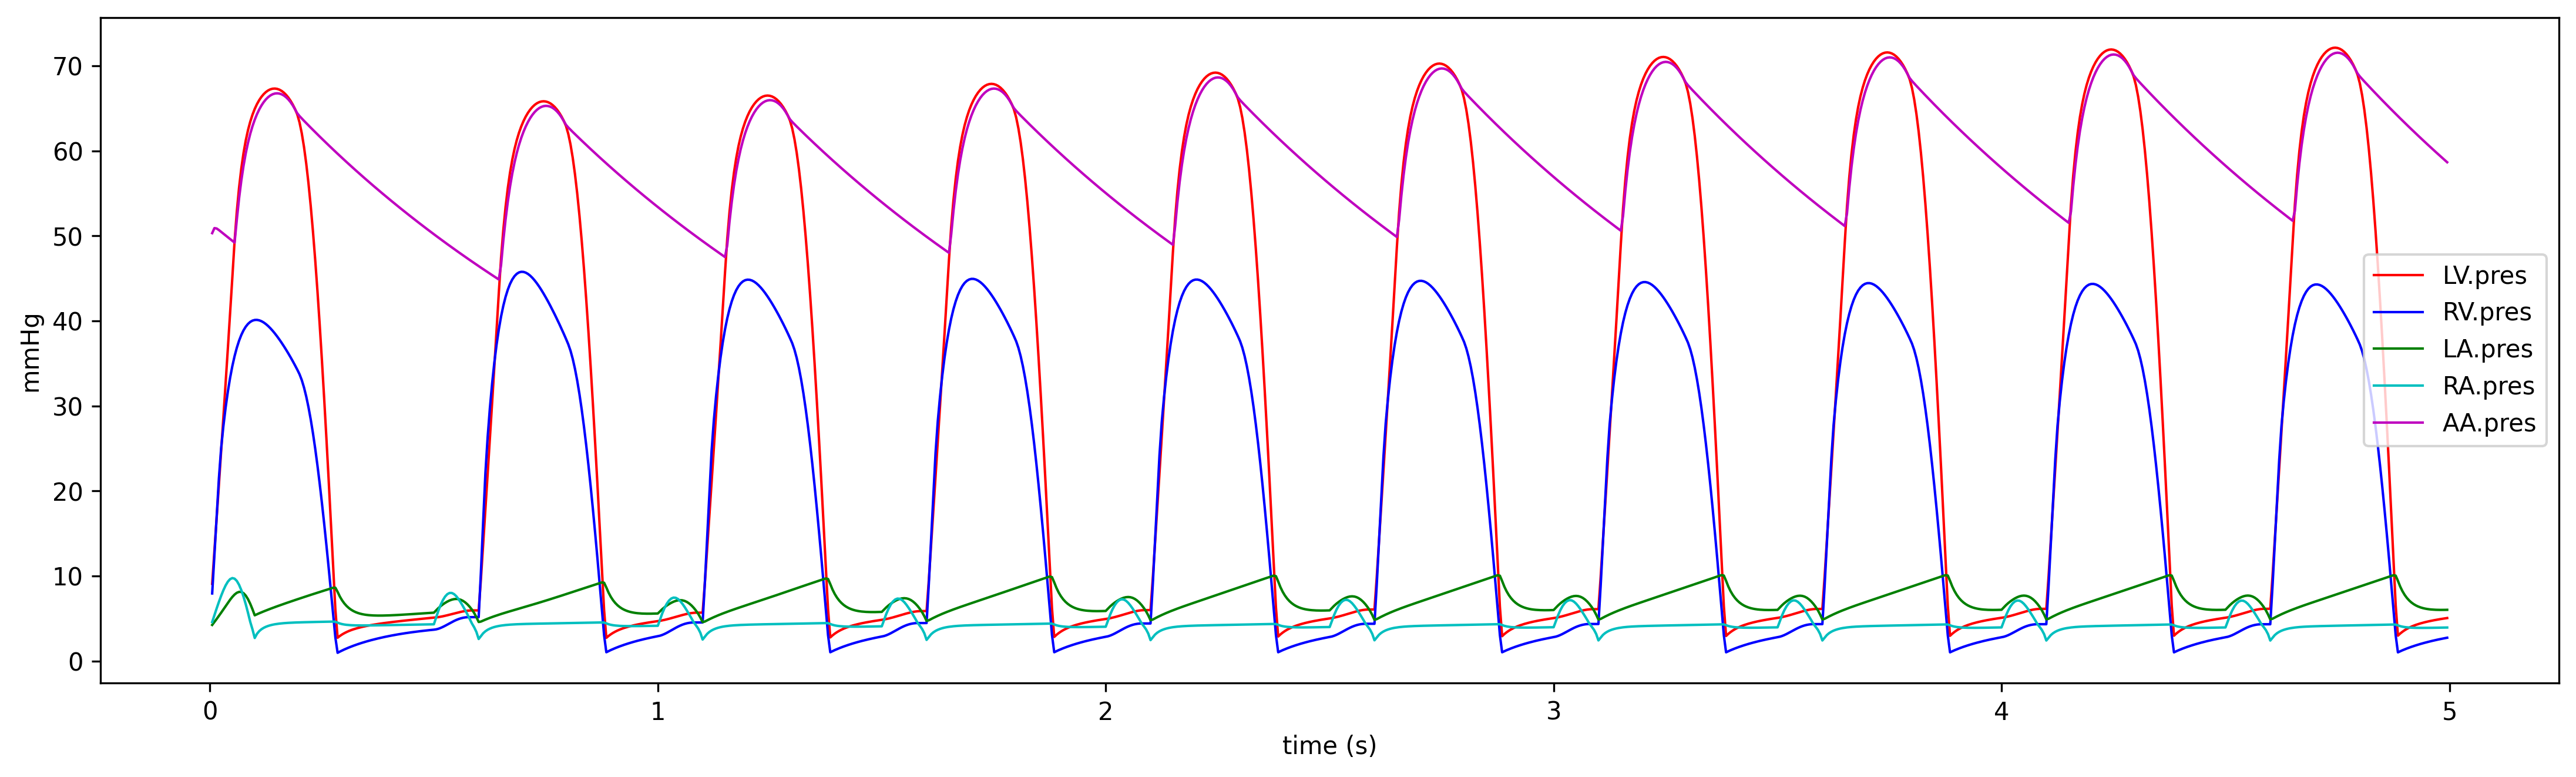

In [ ]:
tim.io.plot_heart_pres()